In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers,datasets

**Importing CIFAR-10 dataset**

In [ ]:
(X_train,ytrain),(X_test,ytest) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
y_train = ytrain.reshape(-1,)
y_test = ytest.reshape(-1,)

In [ ]:
classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [ ]:
def showImage(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

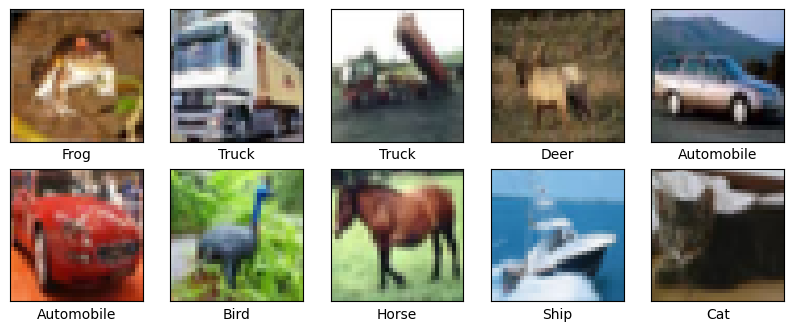

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # Die CIFAR Labels sind Arrays, deshalb benötigen wir den extra Index
    plt.xlabel(classes[y_train[i]])
plt.show()

**Input data is scaled so that it will in the range 0 to 1.**

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**'sparse_categorical_crossentropy' used if output is a number instead of a matrix**

In [ ]:
ann = models.Sequential([
  layers.Flatten(input_shape=(32,32,3)),
  layers.Dense(3000,activation='relu'),
  layers.Dense(1000,activation='relu'),
  layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann_fit = ann.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Epoch 1/5
1563/1563 [==============================] - 11s 5ms/step - loss: 1.8908 - accuracy: 0.3271 - val_loss: 1.6578 - val_accuracy: 0.4145
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6532 - accuracy: 0.4049 - val_loss: 1.5921 - val_accuracy: 0.4360
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5685 - accuracy: 0.4381 - val_loss: 1.5180 - val_accuracy: 0.4603
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5217 - accuracy: 0.4543 - val_loss: 1.4900 - val_accuracy: 0.4740
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4775 - accuracy: 0.4715 - val_loss: 1.5200 - val_accuracy: 0.4622


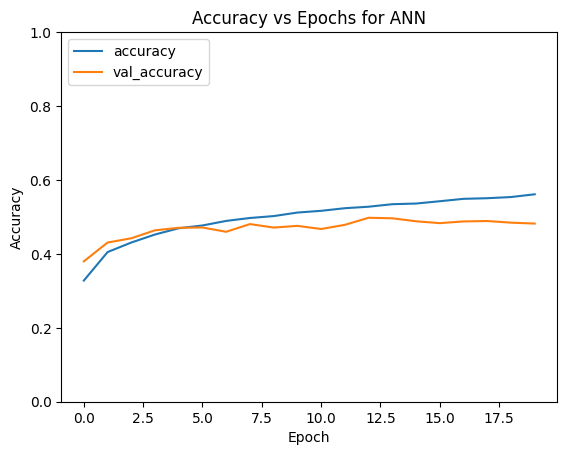

In [ ]:
plt.plot(ann_fit.history['accuracy'], label='accuracy')
plt.plot(ann_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs for ANN')
plt.ylim([0, 1])
plt.legend(loc='upper left')

**Loss and accuracy of the test dataset**

In [ ]:
ann.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5200 - accuracy: 0.4622


[1.5200326442718506, 0.46219998598098755]

In [ ]:
y_pred_ann = ann.predict(X_test_scaled)

313/313 [==============================] - 1s 4ms/step


**Classification report for ANN** 

In [ ]:
from sklearn import metrics
y_pred_ann = ann.predict(X_test_scaled)
y_pred_classes_ann = [np.argmax(x) for x in y_pred_ann]

print('Classification report for ANN')
print(metrics.classification_report(y_test,y_pred_classes_ann))

313/313 [==============================] - 1s 2ms/step
Classification report for ANN
              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1000
           1       0.59      0.58      0.59      1000
           2       0.40      0.25      0.31      1000
           3       0.37      0.23      0.28      1000
           4       0.44      0.36      0.39      1000
           5       0.39      0.48      0.43      1000
           6       0.46      0.59      0.52      1000
           7       0.48      0.63      0.54      1000
           8       0.54      0.71      0.61      1000
           9       0.49      0.59      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



**Confusion matrix for ANN**

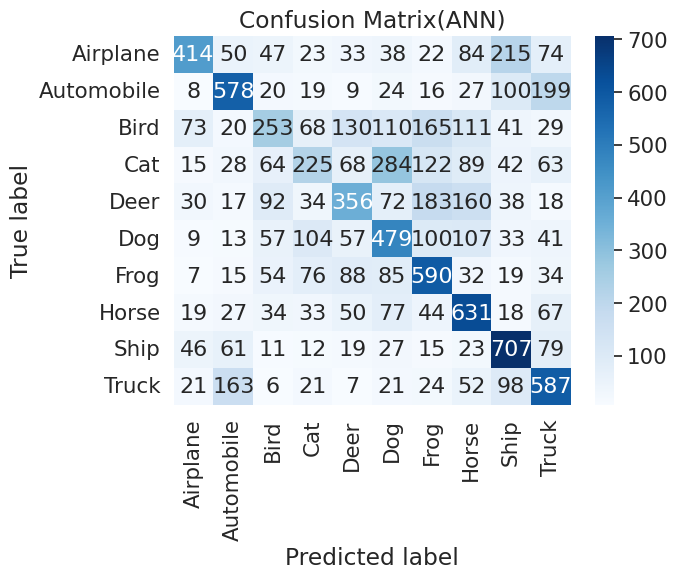

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred_classes_ann)
# plot confusion matrix
sns.set(font_scale=1.4) # adjust font size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g',xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix(ANN)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**Classification using CNN**

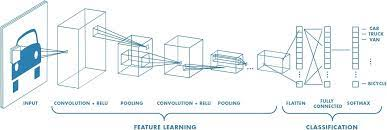

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_fit = cnn.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Epoch 1/20
  30/1563 [..............................] - ETA: 8s - loss: 2.2738 - accuracy: 0.1417

KeyboardInterrupt: ignored

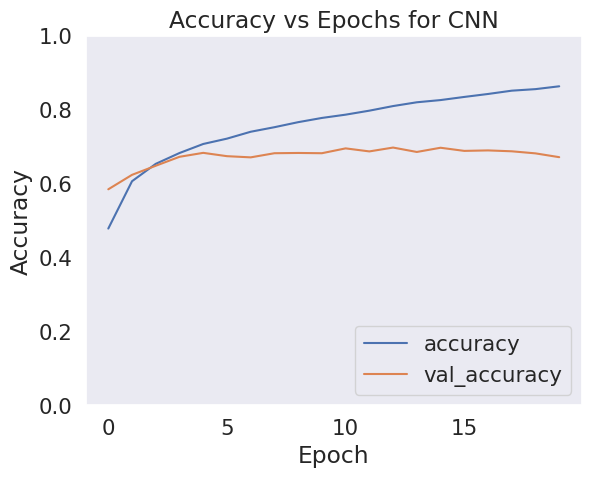

In [ ]:
plt.plot(cnn_fit.history['accuracy'], label='accuracy')
plt.plot(cnn_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy vs Epochs for CNN')
plt.grid(False)
plt.legend(loc='lower right')

In [ ]:
cnn.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2708 - accuracy: 0.6712


[1.2707726955413818, 0.6711999773979187]

In [ ]:
y_pred_cnn = cnn.predict(X_test_scaled)

313/313 [==============================] - 1s 3ms/step


**Classification report for CNN**

In [ ]:
from sklearn import metrics
y_pred_cnn = cnn.predict(X_test_scaled)
y_pred_classes_cnn = [np.argmax(x) for x in y_pred_cnn]

print('Classification report for CNN')
print(metrics.classification_report(y_test,y_pred_classes_cnn))

313/313 [==============================] - 1s 2ms/step
Classification report for CNN
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1000
           1       0.75      0.83      0.79      1000
           2       0.56      0.59      0.57      1000
           3       0.48      0.49      0.49      1000
           4       0.60      0.69      0.64      1000
           5       0.67      0.49      0.56      1000
           6       0.79      0.67      0.73      1000
           7       0.75      0.71      0.73      1000
           8       0.69      0.84      0.76      1000
           9       0.81      0.68      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



**Confusion matrix for CNN**

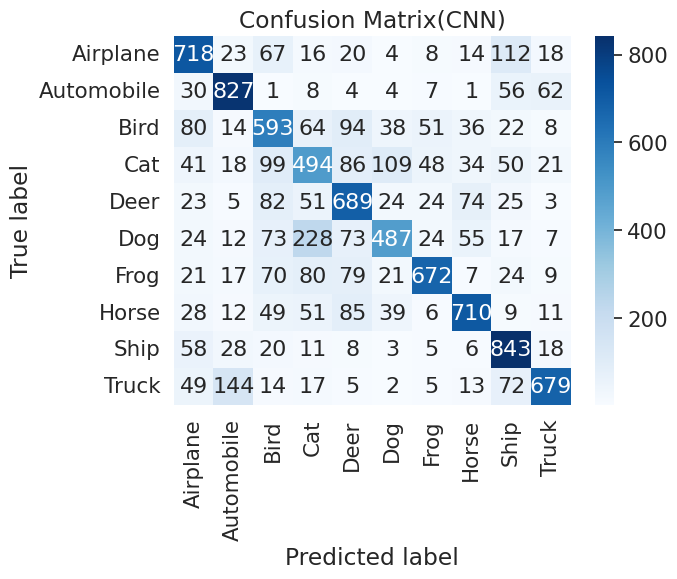

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred_classes_cnn)
# plot confusion matrix
sns.set(font_scale=1.4) # adjust font size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g',xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix(CNN)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

313/313 [==============================] - 1s 2ms/step
Ship


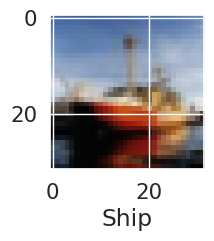

In [ ]:
import random

n = len(X_test)

index = random.randint(0,n)

showImage(X_test,y_test,index)
ypred = cnn.predict(X_test_scaled)
print(classes[np.argmax(y_pred_cnn[index])])